In [5]:
%matplotlib notebook
from IPython.display import Javascript, display, HTML
from ipywidgets import widgets, Layout

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Set Parameters", layout=Layout(width='200px', height='40px'))
button.on_click(run_all)
display(button)

run_all

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$(document).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle show/hide raw code."></form>''')

<IPython.core.display.Javascript object>

Button(description='Set Parameters', layout=Layout(height='40px', width='200px'), style=ButtonStyle())

In [6]:
# Diffusion constant (Value between 0 to 5)
k = int(input('Diffusion Constant (0 to 5) : '))

#Temperature of the rod at rest before heating (Value between 0 to 99)
temp0 = int(input('Temperature (0 to 10) : '))

Diffision Constant = 5
Temperature = 5


<IPython.core.display.Javascript object>


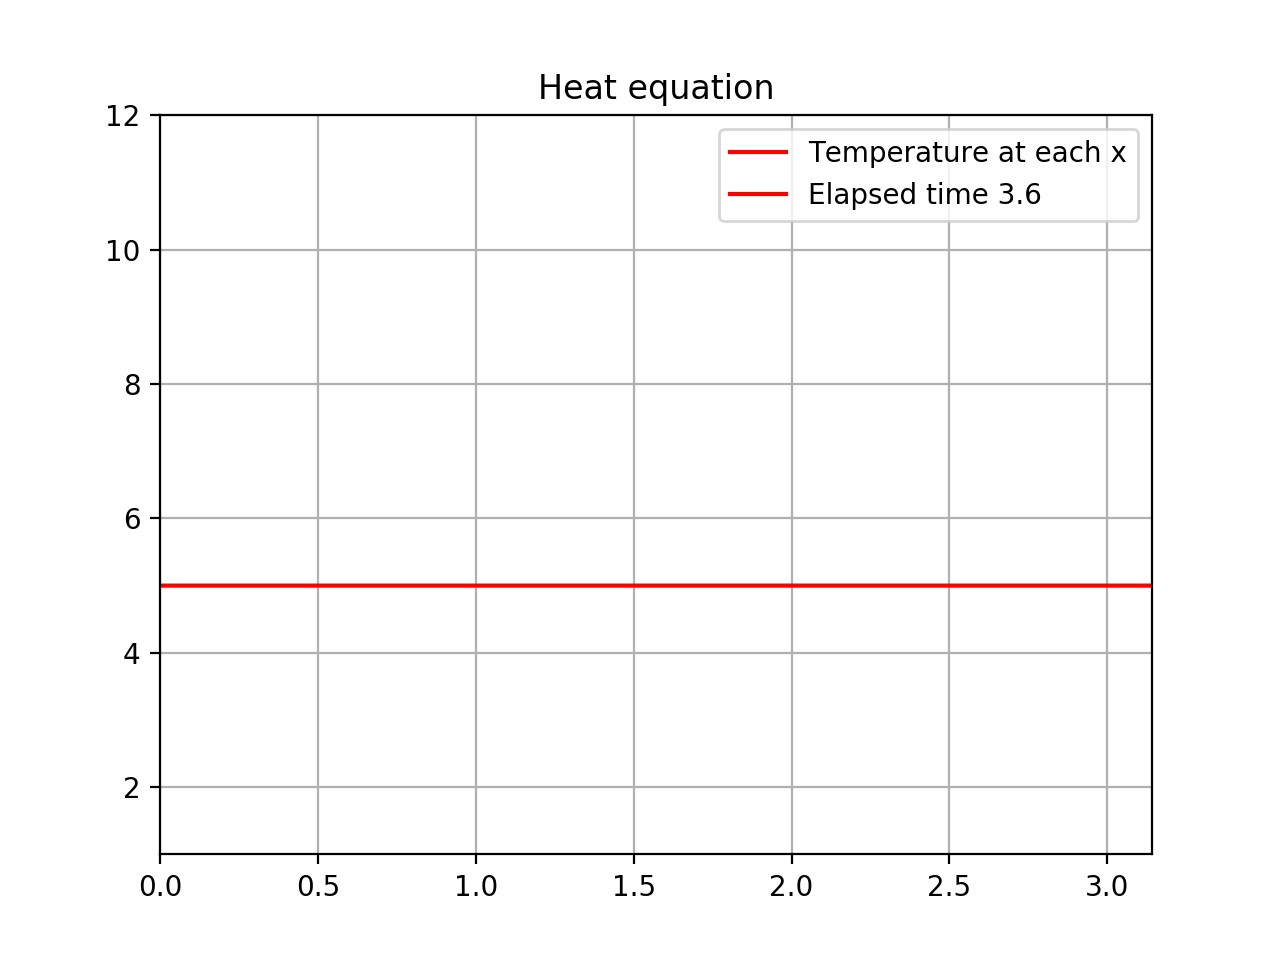

In [7]:
import numpy as np
from numpy import pi

import matplotlib.pyplot as plt
import matplotlib.animation as animation

#Scaling factor (for visualisation purposes)
scale = 5

#Length of the rod (0,L) on the x axis
L = pi

#Initial contitions u(0,t) = u(L,t) = 0. Temperature at x=0 and x=L is fixed
x0 = np.linspace(0,L+1,10000)
t0 = 0

#Increment
dt = 0.01

fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1,1,1)

#Heat function
def u(x,t):
    return temp0 + scale*np.exp(-k*t)*np.sin(x)

#Gradient of u
def grad_u(x,t):
    return scale*np.array([np.exp(-k*t)*np.cos(x),-k*np.exp(-k*t)*np.sin(x)])

a = []
t = []

for i in range(500):
    value = u(x0,t0) + grad_u(x0,t0)[1]*dt
    t.append(t0)
    t0 = t0 + dt
    a.append(value)

k = 0
def animate(k):         #The plot shows the temperature evolving with time
    x = a[k]            #The ends of the rod are kept at temperature temp0
    k += 1              #The rod is heated in one spot, then it cools down
    ax1.clear()
    plt.plot(x0,x,color='red',label='Temperature at each x')
    plt.plot(0,0,color='red',label='Elapsed time '+str(round(t[k],2)))
    plt.grid(True)
    plt.ylim([1,12])
    plt.xlim([0,L])
    plt.title('Heat equation')
    plt.legend()
    
anim = animation.FuncAnimation(fig,animate,frames=300,interval=20,repeat=False)
plt.show()